#<center>Data Augmentation & Preprocessing</center>

<center>En este notebook encuentra los pasos para realizar data augmentation y el procesamiento de las imágenes.</center>

In [1]:
# Se importa Google Drive para acceder a los datos
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Se importan las librerías necesarias utilizadas a lo largo del notebook
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv

# Balanceo de Clases con Data Augmentation

Se decidió unir las carpetas de train y test en una sola para conocer el número total de imágenes para cada clase con las siguientes líneas de código:

**Move files from one directory to another**

In [ ]:
import shutil
import os
    
source_dir = '/content/drive/MyDrive/DeepVision/test_database/test/1/'
target_dir = '/content/drive/MyDrive/DeepVision/test_database/train/1/'
    
file_names = os.listdir(source_dir)
    
for file_name in file_names:
    shutil.move(os.path.join(source_dir, file_name), target_dir)

Se obtuvo la suma de las imágenes, así:

* Clase 0: 1100

* Clase 1: 841

* Clase 2: 933

* Clase 3: 564

Posterior a eso, se decide crear nuevas imágenes con Data Augmentation hasta igualar el número de muestras que tiene la clase 0 (1100) para así obtener un total de 4400 imágenes.

De esta forma, para cada clase se van a aumentar el siguiente número de imágenes:

* Clase 0: 0

* Clase 1: 259

* Clase 2: 167

* Clase 3: 536

Para hacerlo se eligió la herramienta **[Augmentor](https://augmentor.readthedocs.io/en/master/)** que es "un paquete de Python diseñado para ayudar al aumento y la generación artificial de datos de imágenes para tareas de aprendizaje automático. Es principalmente una herramienta de aumento de datos, pero también incorporará una funcionalidad básica de preprocesamiento de imágenes."

In [3]:
# Se instala el paquete Augmentor
!pip install Augmentor

In [11]:
import Augmentor
# Se crea un Pipeline con la ruta que contiene las imágenes de cada clase a partir de las cuales se generarán nuevas imágenes
#p = Augmentor.Pipeline("/content/drive/MyDrive/DeepVision/test_database/train/1")
p = Augmentor.Pipeline('/content/drive/MyDrive/DeepVision/data_analysis/test_database/all_images/3')

Initialised with 1500 image(s) found.
Output directory set to /content/drive/MyDrive/DeepVision/data_analysis/test_database/all_images/3/output.

La anterior línea de código inicializa el Pipeline con el número de imágenes encontradas en esa ruta y define como directorio de salida una carpeta nueva llamada 'output' ubicada en la misma ruta que contiene las imágenes originales.

Los pasos posteriores a seguir son:

* Se define el número y tipo de transformaciones que se van a aplicar a las muestras para generar nuevas imágenes
* Se define la probabilidad de ocurrencia de cada transformación sobre las muestras y el número de imágenes nuevas que se quiere generar
* En este caso se aplicarán 4 transformaciones con el 25% de ocurrencia cada una

In [12]:
# Flipping an image horizontally
p.flip_left_right(probability=0.25)
# Rotating an image clockwise or anticlockwise by a given angle 90°
p.rotate_random_90(probability=0.25)
# Skewing an image with a perspective
p.skew_tilt(probability=0.25, magnitude=1)
# Randomly distortioning an image
p.random_distortion(probability=0.25, grid_width=4, grid_height=4, magnitude=8)

In [13]:
num_samples = 10
p.sample(num_samples)

Processing <PIL.Image.Image image mode=RGB size=212x245 at 0x7FF9C6D7B290>: 100%|██████████| 10/10 [00:00<00:00, 19.14 Samples/s]


Se realizó el aumento de imágenes para cada clase y se utilizaron las mismas líneas de código para mover las imágenes de la carpeta 'output' a la carpeta raíz de cada clase y posteriormente a una carpeta macro llamada 'all_images' que contiene 4 carpetas: '0', '1', '2', '3'.

Para finalizar y homogeneizar los nombres de las imágenes, se utilizaron las siguientes líneas de código:

**Rename files**

In [ ]:
import os
path = '/content/drive/MyDrive/DeepVision/test_database/all_images/3'
files = os.listdir(path)


for index, file in enumerate(files):
    os.rename(os.path.join(path, file), os.path.join(path, ''.join([str(index), '.jpg'])))

**Visualización de imágenes aumentadas**

Text(0.5, 0.98, 'Class 1: Zucaritas')

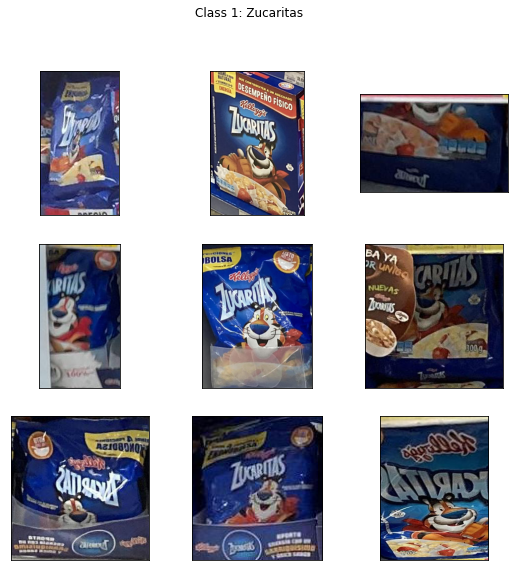

In [14]:
output_1 = '/content/drive/MyDrive/DeepVision/data_analysis/test_database/all_images/1/output'
fig = plt.figure(figsize=(9,9))
for i in range(9):
  img = plt.imread(os.path.join(output_1,os.listdir(output_1)[i]))
  ax = fig.add_subplot(3,3,i+1)
  ax = plt.imshow(img), plt.xticks([]), plt.yticks([])
fig.suptitle('Class 1: Zucaritas')

Text(0.5, 0.98, 'Class 2: Choco Krispis')

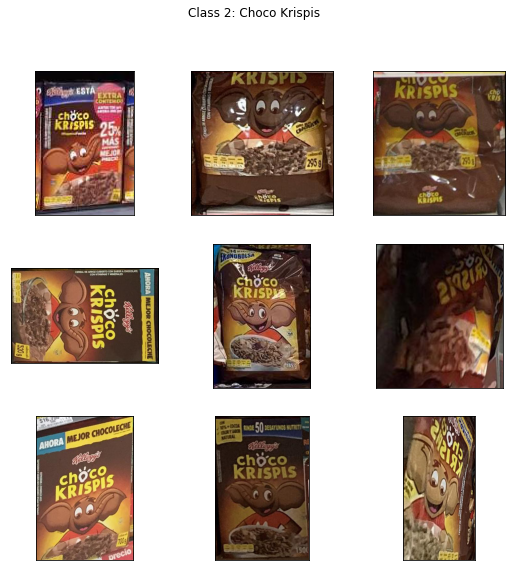

In [15]:
output_2 = '/content/drive/MyDrive/DeepVision/data_analysis/test_database/all_images/2/output'
fig = plt.figure(figsize=(9,9))
for i in range(9):
  img = plt.imread(os.path.join(output_2,os.listdir(output_2)[i]))
  ax = fig.add_subplot(3,3,i+1)
  ax = plt.imshow(img), plt.xticks([]), plt.yticks([])
fig.suptitle('Class 2: Choco Krispis')

Text(0.5, 0.98, 'Class 3: Froot Loops')

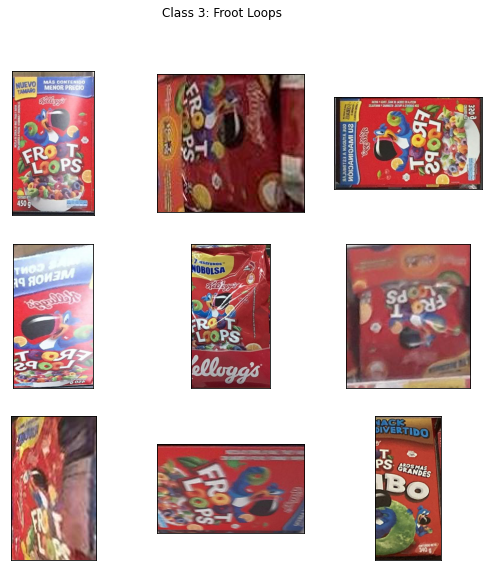

In [16]:
output_3 = '/content/drive/MyDrive/DeepVision/data_analysis/test_database/all_images/3/output'
fig = plt.figure(figsize=(9,9))
for i in range(9):
  img = plt.imread(os.path.join(output_3,os.listdir(output_3)[i]))
  ax = fig.add_subplot(3,3,i+1)
  ax = plt.imshow(img), plt.xticks([]), plt.yticks([])
fig.suptitle('Class 3: Froot Loops')

# Pre-processing

En esta sección se realizan los siguientes puntos:

* Redimensionamiento de las imágenes 

* Creación de nuevos archivos de labels a partir de las nuevas imágenes obtenidas

* Creación de arreglos con las imágenes procesadas

In [ ]:
# Paths o rutas necesarias que contienen los datos
root = '/content/drive/MyDrive/DeepVision/test_database_2'

all_data = '/content/drive/MyDrive/DeepVision/test_database/all_images'
proc_img0 = '/content/drive/MyDrive/DeepVision/test_database/all_processed_images/0/'
proc_img1 = '/content/drive/MyDrive/DeepVision/test_database/all_processed_images/1/'
proc_img2 = '/content/drive/MyDrive/DeepVision/test_database/all_processed_images/2/'
proc_img3 = '/content/drive/MyDrive/DeepVision/test_database/all_processed_images/3/'

train_path = '/content/drive/MyDrive/DeepVision/test_database/train'
test_path = '/content/drive/MyDrive/DeepVision/test_database/test'
val_path = '/content/drive/MyDrive/DeepVision/test_database/val'

La siguiente celda de código recorre las carpetas contenidas en la carpeta 'all_images', lee todas las imágenes y hace un resize al tamaño de 224 x 224 debido a la intención de utilizar como modelo de red neuronal convolucional la arquitectura de AlexNet.

Posterior al redimensionamiento se guardan las imágenes en la ruta para imágenes procesadas dentro de su carpeta correspondiente. Así mismo, se guarda en una lista las imágenes y en otra las etiquetas de cada clase.

In [ ]:
img_size = 224 # Para usar AlexNet o VGGNet

all_labels = []
all_images = []

folder_name = os.listdir(all_data)

ix = 0
iy = 0
for i in folder_name:
  folder_path = os.path.join(all_data,i)
  label = i
  for img_name in os.listdir(folder_path):
    img_path = os.path.join(folder_path, img_name)
    # Leer las imágenes
    img = cv.imread(img_path)
    # Resize images
    img = cv.resize(img, (img_size, img_size))
    # Save images in /content/drive/MyDrive/DeepVision/test_database/all_processed_images
    if ix == 0:
      filename = proc_img0 + str(iy) + '.jpg'
      cv.imwrite(filename, img)
    if ix == 1:
      filename = proc_img1 + str(iy) + '.jpg'
      cv.imwrite(filename, img)
    if ix == 2:
      filename = proc_img2 + str(iy) + '.jpg'
      cv.imwrite(filename, img )
    if ix == 3:
      filename = proc_img3 + str(iy) + '.jpg'

    # Append images and labels in the list
    all_images.append(img)
    all_labels.append(label)

    iy += 1
    print(iy)


  ix += 1
  iy = 0

**Nota**

El pre-procesamiento de todas las imágenes (4400) con CPU duró aproximadamente 1 min 41 segundos.

CPU con 12.69 GB de RAM y 107.72 GB de Disco proporcionada por Google Colab.

Finalmente, se convierten las listas en arreglos y se guardan en Drive los archivos con extensión .npy que serán utilizados más adelante en el entrenamiento de la red.

In [ ]:
# Convertir las listas en arrays para alimentar el modelo de CNN
all_images = np.array(all_images)
all_labels = np.array(all_labels)

# Save np.array in Drive
all_images = np.save(os.path.join(root, 'all_images.npy'), all_images)
all_labels = np.save(os.path.join(root, 'all_labels.npy'), all_labels)

# Split Data, Normalization and Preparation

En esta sección se encuentra:

* La división de los datos en **entrenamiento**, **validación** y **prueba**. 

* Normalización de las imágenes de train, val y test.

* Preparación de los targets para que puedan ser alimentados a la CNN.

**Split**

In [ ]:
# Load .npy files to split data
images = np.load(os.path.join(root,'all_images.npy'))
labels = np.load(os.path.join(root,'all_labels.npy'), allow_pickle=True)

# Split data --> Train 70%, Val 20%, Test 10%
from sklearn.model_selection import train_test_split
x_train, x_val_temp, y_train, y_val_temp = train_test_split(images, labels, test_size=0.3, shuffle=True, stratify=labels, random_state=88)
x_val, x_test, y_val, y_test = train_test_split(x_val_temp, y_val_temp, test_size=0.33, stratify=y_val_temp)

In [ ]:
# Print shape of each array
print('1. x_train:', x_train.shape)
print('1. y_train:', y_train.shape)
print('2. x_val:', x_val.shape)
print('2. y_val:', y_val.shape)
print('3. x_test:', x_test.shape)
print('3. y_test:', y_test.shape)

1. x_train: (3080, 224, 224, 3)
1. y_train: (3080,)
2. x_val: (884, 224, 224, 3)
2. y_val: (884,)
3. x_test: (436, 224, 224, 3)
3. y_test: (436,)


**Normalization**

Se decide normalizar las imágenes en un rango entre 0 y 1 para homogeneizar los datos y que la red pueda procesarlos correctamente. Se dividen las imágenes entre 255 ya que este es el valor más grande de pixel.

In [ ]:
# Normalize the images
x_train_norm = x_train/255
x_val_norm = x_val/255
x_test_norm = x_test/255

In [ ]:
# Save both x_... and x_..._norm
x_train = np.save(os.path.join(train_path, 'x_train.npy'), x_train)
x_val = np.save(os.path.join(val_path, 'x_val.npy'), x_val)
x_test = np.save(os.path.join(test_path, 'x_test.npy'), x_test)

x_train_norm = np.save(os.path.join(train_path, 'x_train_norm.npy'), x_train_norm)
x_val_norm = np.save(os.path.join(val_path, 'x_val_norm.npy'), x_val_norm)
x_test_norm = np.save(os.path.join(test_path, 'x_test_norm.npy'), x_test_norm)

Se verifica que los datos quedaron normalizados entre 0 y 1

In [ ]:
x_train_norm, x_val_norm

(array([[[[0.04313725, 0.03921569, 0.05490196],
          [0.05098039, 0.03529412, 0.05882353],
          [0.07058824, 0.03529412, 0.0627451 ],
          ...,
          [0.03529412, 0.03137255, 0.04705882],
          [0.03529412, 0.03137255, 0.04705882],
          [0.03137255, 0.02745098, 0.04313725]],
 
         [[0.03529412, 0.03137255, 0.04705882],
          [0.03529412, 0.02745098, 0.04705882],
          [0.03529412, 0.02352941, 0.03921569],
          ...,
          [0.03529412, 0.03137255, 0.04705882],
          [0.03529412, 0.03137255, 0.04705882],
          [0.03137255, 0.02745098, 0.04313725]],
 
         [[0.05098039, 0.03921569, 0.04705882],
          [0.03529412, 0.03137255, 0.03921569],
          [0.01960784, 0.03137255, 0.02745098],
          ...,
          [0.03529412, 0.03137255, 0.04705882],
          [0.03529412, 0.03137255, 0.04705882],
          [0.03137255, 0.02745098, 0.04313725]],
 
         ...,
 
         [[0.38039216, 0.34509804, 0.6627451 ],
          [0.37647

**Preparation**

En esta sección se deben preparar los labels. Debido a que es un problema de clasificación multiclase es necesario transformar los labels a OneHotEncoding para que sean entendidos por la red. OneHotEncoding crea tantas columnas como clases haya y le asigna un 1 a cada clase en su respectiva columna. 

Primero se debe hacer un reshape de los vectores de target para que pasen de 1D a 2D y así puedan ser transformados.

In [ ]:
# Reshape target vectors to fit them to the OneHotEncoder
y_train_r = np.reshape(y_train,(-1,1)) # 2D array
y_val_r = np.reshape(y_val,(-1,1))
y_test_r = np.reshape(y_test,(-1,1))

print('1. y_train_r:', y_train_r.shape)
print('2. y_val_r:', y_val_r.shape)
print('3. y_test_r:', y_test_r.shape)

1. y_train_r: (3080, 1)
2. y_val_r: (884, 1)
3. y_test_r: (436, 1)


In [ ]:
# Perform OneHotEncoding to the target vectors
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)
y_train_enc = enc.fit_transform(y_train_r) 
y_val_enc = enc.fit_transform(y_val_r)
y_test_enc = enc.fit_transform(y_test_r)

In [ ]:
# Compare both arrays: y_train(1D array) and y_train_enc
print('y_train:{}\ny_train_enc:{}'.format(y_train,y_train_enc))

y_train:['3' '2' '0' ... '2' '3' '2']
y_train_enc:[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


$\color{blue}{\text{Classes with One Hot Encoding}}$

0 --> 1 0 0 0

1 --> 0 1 0 0

2 --> 0 0 1 0

3 --> 0 0 0 1

In [ ]:
# Save the arrays
y_train = np.save(os.path.join(train_path, 'y_train.npy'), y_train)
y_val = np.save(os.path.join(val_path, 'y_val.npy'), y_val)
y_test = np.save(os.path.join(test_path, 'y_test.npy'), y_test)

y_train_enc = np.save(os.path.join(train_path, 'y_train_enc.npy'), y_train_enc)
y_val_enc = np.save(os.path.join(val_path, 'y_val_enc.npy'), y_val_enc)
y_test_enc = np.save(os.path.join(test_path, 'y_test_enc.npy'), y_test_enc)